In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable 

In [4]:
df_tickets = pd.read_csv("data/historico_tickets_limpio.csv", index_col = 0)
pd.options.display.max_columns = None

In [5]:
df_tickets.head(3)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
2,GDDESR-1342539995,2016-06-18,569,29,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3,5,1 semestre,2016,Junio


1. Explorar los valores nulos.


In [6]:
df_tickets.stb.missing()
# no tenemos valores nulos en este dataframe.

,missing,total,percent
id_ticket,0,97386,0.0
fecha,0,97386,0.0
id_empleado,0,97386,0.0
id_agente,0,97386,0.0
categoría,0,97386,0.0
tipo,0,97386,0.0
severidad,0,97386,0.0
prioridad,0,97386,0.0
días_resolución,0,97386,0.0
satisfacción,0,97386,0.0


2. Explorad la columna de categoría y reportad los resultados solo para aquellas categorías que incluyan el 70% de los datos.


In [7]:
df_tickets.stb.freq(["categoría"], thresh=70)

,categoría,count,percent,cumulative_count,cumulative_percent
0,Sistema,38961,40.006777,38961,40.006777
1,Acceso/Login,29165,29.947836,68126,69.954614
2,others,29260,30.045386,97386,100.000000


3. Explorad la columna categoría en relación al tipo de problema, filtrando de nuevo por aquellas categorías que incluyan el 70% de los datos.


In [8]:
df_tickets.stb.freq(["tipo"], thresh=70)
#nos devuelve solo la categoría "others" porque la categoría con más valores ("solicitud")tiene más de un  70 por ciento.

,tipo,count,percent,cumulative_count,cumulative_percent
0,others,97386,100.0,97386,100.0


4. Haced los mismo para la columna tipo en relación a la columna semestre. En este caso filtrad y mostrad los datos que incluyan el 60% de los datos.


In [9]:
df_tickets.stb.freq(["tipo","semestre"], thresh=60)

,tipo,semestre,count,percent,cumulative_count,cumulative_percent
0,Solicitud,2º semestre,37463,38.468568,37463,38.468568
1,others,others,59923,61.531432,97386,100.000000


5. Por último, realizad este análisis para la columna mes en relación a la columna tipo. Mostrad solo los resultados para las categorías que incluyan el 60% de los datos.


In [10]:
df_tickets.stb.freq(["mes","tipo"], thresh=60)

,mes,tipo,count,percent,cumulative_count,cumulative_percent
0,Octubre,Solicitud,6378,6.549196,6378,6.549196
1,Agosto,Solicitud,6360,6.530713,12738,13.079909
2,Diciembre,Solicitud,6305,6.474237,19043,19.554145
3,Noviembre,Solicitud,6192,6.358203,25235,25.912349
4,Marzo,Solicitud,6186,6.352042,31421,32.264391
5,Septiembre,Solicitud,6168,6.333559,37589,38.597950
6,Junio,Solicitud,6107,6.270922,43696,44.868872
7,Mayo,Solicitud,6078,6.241143,49774,51.110016
8,Julio,Solicitud,6060,6.222660,55834,57.332676
9,others,others,41552,42.667324,97386,100.000000


6. Vamos a hacer un pequeño análisis de los outliers que podamos encontrar en nuestro conjunto de datos. Para realizar esto deberemos:
- 6.1. Quedarnos solo con la columnas que sean númericas en nuestro conjunto de datos.
- 6.2. Realizar un box-plot para ver cual de ellas tiene outliers e interpretar como esto nos podría afectar a las conclusiones que extraigamos de nuestros datos.
📌 Nota Igual que siempre, no nos vale solo con picar el código, queremos que nos incluyais las conclusiones que extraeis.

In [11]:
df_numericas = df_tickets.select_dtypes(include=np.number)
df_numericas

,id_empleado,id_agente,días_resolución,satisfacción,año
0,1735,4,0,5,2016
1,1566,10,0,5,2016
2,569,29,3,5,2016
3,320,40,9,5,2016
4,1842,31,0,5,2016
...,...,...,...,...,...
29083,1142,1,11,5,2020
29084,223,40,7,4,2020
29085,256,7,13,5,2020
29086,1060,9,9,5,2020


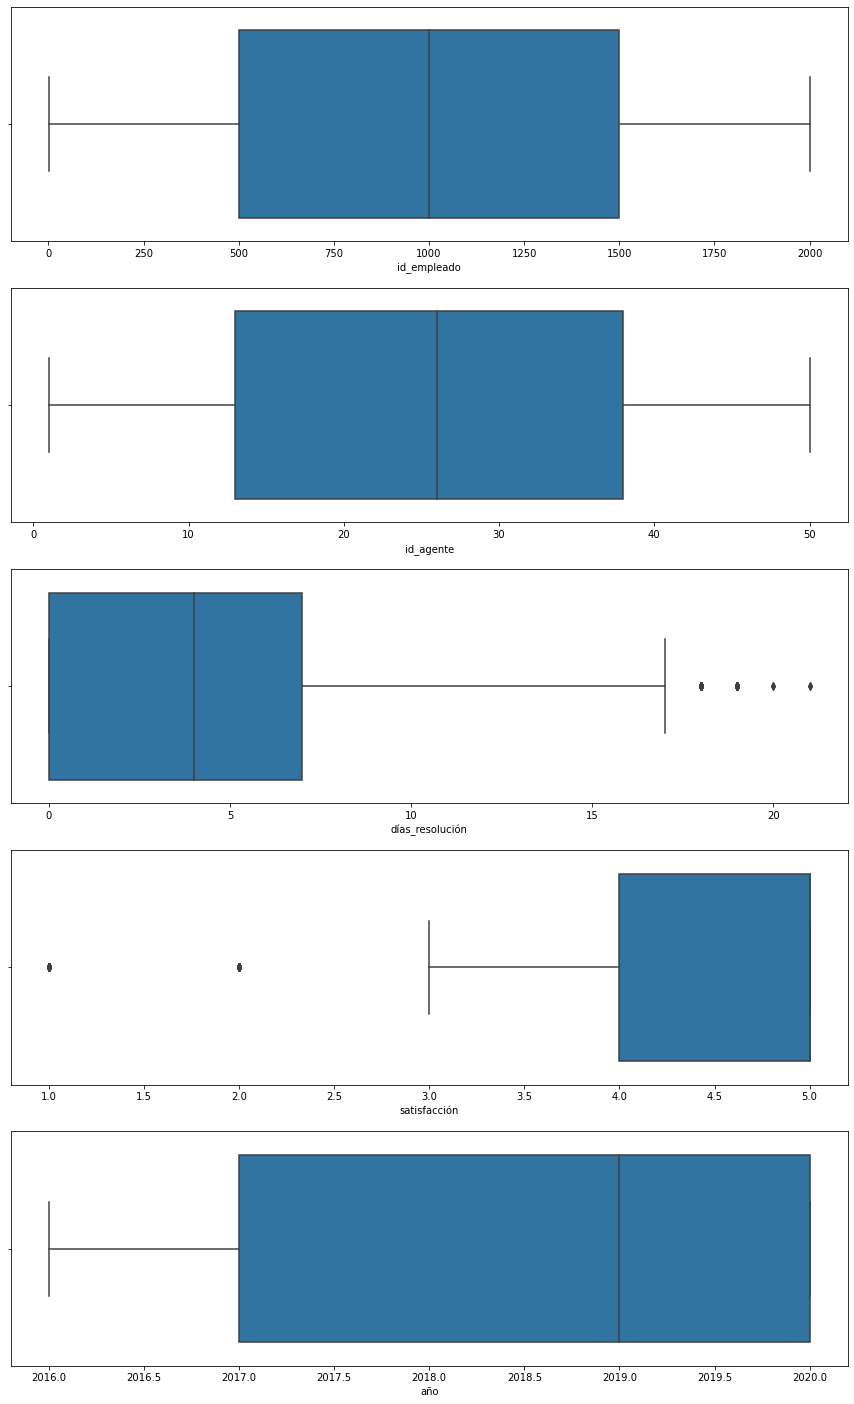

In [12]:
fig, axes = plt.subplots(5, 1, figsize=(15,25))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x = df_numericas.columns[i], data = df_tickets, ax=axes[i]); # para trazar una línea de densidad

plt.show()

- Las dos primeras gráficas son de las columnas, "id_empleado" e "id_agente", por este motivo las gráficas estan perfectamente distribuidas. Sin embargo la información que da, no es relevante ya que a pesar de que las columnas son de tipo numérico se comportan como variables categóricas.
- La mayoría de las incidencias se resuelven entre los primeros 7 días. A partir de el día 17 se considera que el valor es un outlier, es decir, es atípico.
- En la gráfica cuatro,los números sugieren que el índice de satisfacción es muy elevado. Un 75% de los clientes valoran positivamente la atención, entre un 4 y un 5, que corresponden a las puntuaciones más altas. Dado los valores de nuestro conjunto de datos, todas las puntuaciones por debajo de tres se consideran valores atípicos. En este rango nos encontramos dos valoraciones de "1" y "2" que se consideran outliers.
- La gráfica indica que se ha habido un aumento en la cantidad de ticket que se generan, es decir, la tendencia va hacia arriba. El 50% de los datos se concemtran entre el 2019 y 2020.